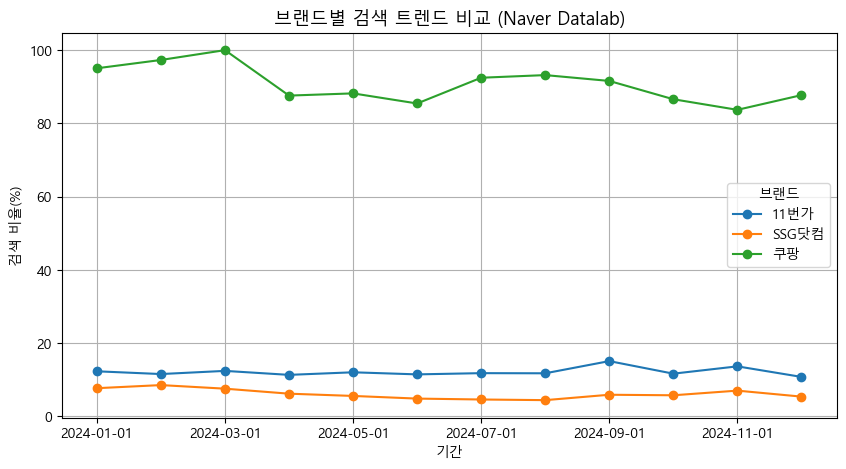

In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# ✅ 1️⃣ 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'   # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False

# 네이버 개발자센터에서 발급받은 Client ID/Secret
client_id = "A4sQ5wAahyjuaeKP83_h"
client_secret = "MBqwiX9ORb"

url = "https://openapi.naver.com/v1/datalab/search"

body = {
    "startDate": "2024-01-01",
    "endDate": "2024-12-31",
    "timeUnit": "month",
    "keywordGroups": [
        {"groupName": "SSG닷컴", "keywords": ["쓱닷컴", "SSG닷컴"]},
        {"groupName": "쿠팡", "keywords": ["쿠팡"]},
        {"groupName": "11번가", "keywords": ["11번가"]}
    ],
    "device": "mo",
    "ages": ["2", "3", "4"],
    "gender": "f"
}

headers = {
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret,
    "Content-Type": "application/json",
    "User-Agent": "Mozilla/5.0"
}

# API 요청
res = requests.post(url, headers=headers, json=body)

if res.status_code != 200:
    print("❌ API 요청 실패:", res.status_code, res.text)
else:
    data = res.json()

    # JSON → DataFrame 변환
    rows = []
    for group in data["results"]:
        name = group["title"]
        for item in group["data"]:
            rows.append({
                "date": item["period"],
                "brand": name,
                "ratio": item["ratio"]
            })
    df = pd.DataFrame(rows)

    # 피벗 테이블로 브랜드별 비교
    df_pivot = df.pivot(index="date", columns="brand", values="ratio")

    # 시각화
    df_pivot.plot(kind="line", marker="o", figsize=(10, 5))
    plt.title("브랜드별 검색 트렌드 비교 (Naver Datalab)", fontsize=13)
    plt.ylabel("검색 비율(%)")
    plt.xlabel("기간")
    plt.grid(True)
    plt.legend(title="브랜드")
    plt.show()

📅 분석 기간: 2024-09-01 ~ 2025-09-30


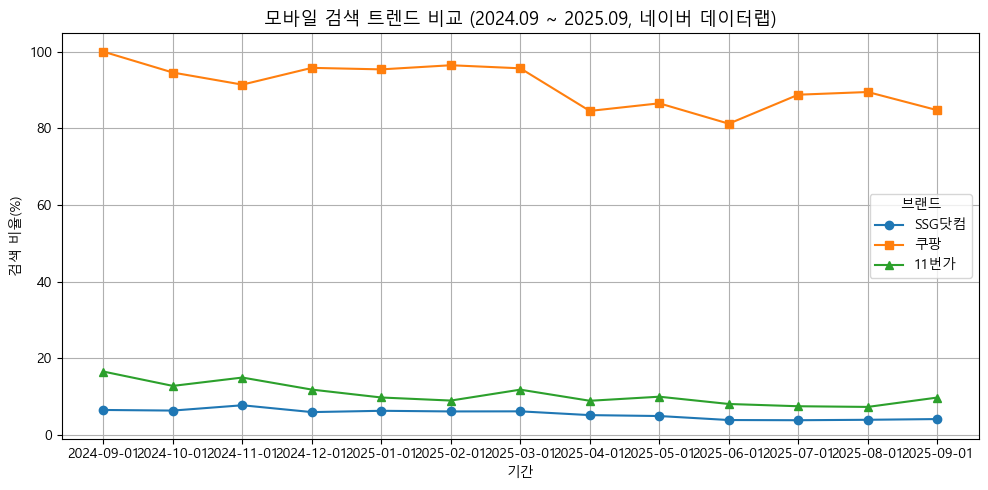

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# ✅ 1️⃣ 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'   # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False

# ✅ 2️⃣ 네이버 API 정보
client_id = "A4sQ5wAahyjuaeKP83_h"
client_secret = "MBqwiX9ORb"

url = "https://openapi.naver.com/v1/datalab/search"

# ✅ 3️⃣ 분석 기간: 2024년 10월 1일 ~ 2025년 9월 30일
start_date = "2024-09-01"
end_date = "2025-09-30"

print(f"📅 분석 기간: {start_date} ~ {end_date}")

# ✅ 4️⃣ 요청 본문
body = {
    "startDate": start_date,
    "endDate": end_date,
    "timeUnit": "month",
    "keywordGroups": [
        {"groupName": "SSG닷컴", "keywords": ["쓱닷컴", "SSG닷컴"]},
        {"groupName": "쿠팡", "keywords": ["쿠팡"]},
        {"groupName": "11번가", "keywords": ["11번가"]}
    ],
    "device": "mo",  # ✅ 모바일 기준
    "ages": ["2", "3", "4"],  # 20~49세 여성
    "gender": "f"
}

headers = {
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret,
    "Content-Type": "application/json",
    "User-Agent": "Mozilla/5.0"
}

# ✅ 5️⃣ API 요청
res = requests.post(url, headers=headers, json=body)

if res.status_code != 200:
    print("❌ API 요청 실패:", res.status_code, res.text)
else:
    data = res.json()

    # ✅ 6️⃣ JSON → DataFrame 변환
    rows = []
    for group in data["results"]:
        name = group["title"]
        for item in group["data"]:
            rows.append({
                "date": item["period"],
                "brand": name,
                "ratio": item["ratio"]
            })
    df = pd.DataFrame(rows)

    # ✅ 7️⃣ 피벗 테이블로 브랜드별 비교
    df_pivot = df.pivot(index="date", columns="brand", values="ratio")

    # ✅ 8️⃣ 시각화
    plt.figure(figsize=(10, 5))
    plt.plot(df_pivot.index, df_pivot["SSG닷컴"], marker="o", label="SSG닷컴")
    plt.plot(df_pivot.index, df_pivot["쿠팡"], marker="s", label="쿠팡")
    plt.plot(df_pivot.index, df_pivot["11번가"], marker="^", label="11번가")

    plt.title("모바일 검색 트렌드 비교 (2024.09 ~ 2025.09, 네이버 데이터랩)", fontsize=13)
    plt.ylabel("검색 비율(%)")
    plt.xlabel("기간")
    plt.grid(True)
    plt.legend(title="브랜드")
    plt.tight_layout()
    plt.show()
